In [1]:
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/conversion_data.csv'

In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [6]:
df.isna().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [7]:
df.duplicated().sum()

299903

In [8]:
df.duplicated().sum()/df.shape[0]

0.9484598355471221

In [9]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [10]:
df.describe(include='O')

,country,source
count,316200,316200
unique,4,3
top,US,Seo
freq,178092,155040


<AxesSubplot: >

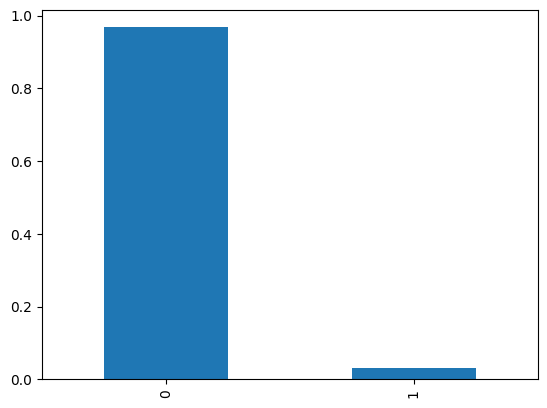

In [11]:
df.converted.value_counts(normalize=True).plot(kind='bar')

In [12]:
df.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

<AxesSubplot: xlabel='country'>

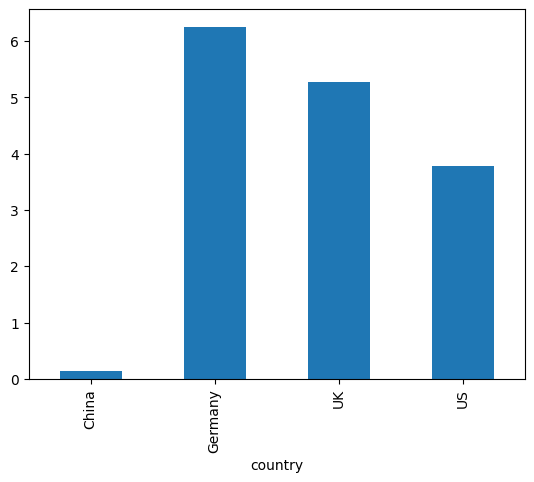

In [13]:
df.groupby('country')['converted'].mean().multiply(100).plot(kind='bar')

In [14]:
df.groupby('country')['converted'].mean().round(3).multiply(100)

country
China      0.1
Germany    6.2
UK         5.3
US         3.8
Name: converted, dtype: float64

<AxesSubplot: xlabel='country'>

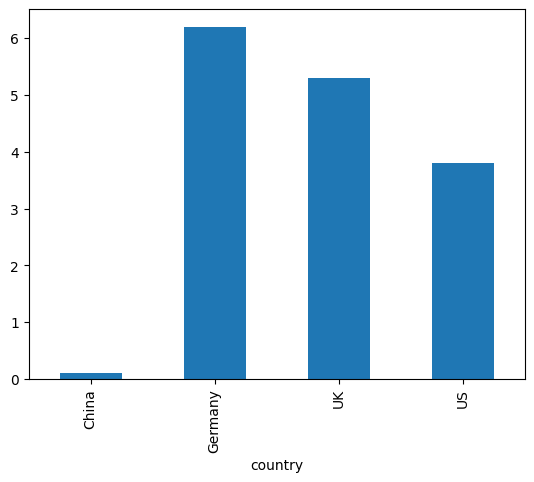

In [15]:
df.groupby('country')['converted'].mean().round(3).multiply(100).plot(kind='bar')

<AxesSubplot: xlabel='source'>

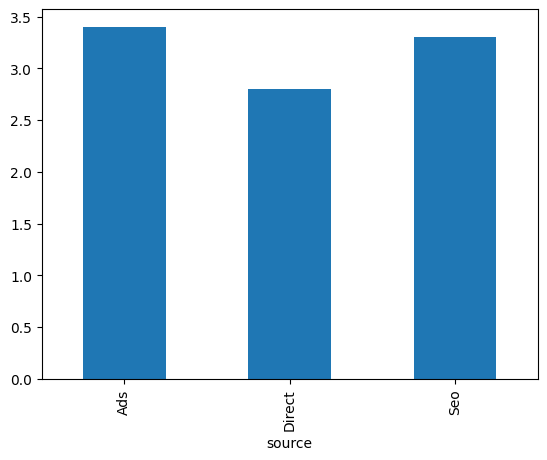

In [16]:
df.groupby('source')['converted'].mean().round(3).multiply(100).plot(kind='bar')

<AxesSubplot: xlabel='age'>

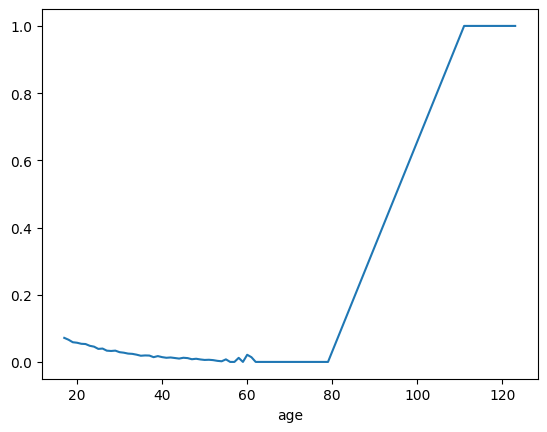

In [17]:
df.groupby('age')['converted'].mean().plot()

In [18]:
df.age.describe([0.1,0.20,0.85,0.95,0.99])

count    316200.000000
mean         30.569858
std           8.271802
min          17.000000
10%          20.000000
20%          23.000000
50%          30.000000
85%          39.000000
95%          45.000000
99%          52.000000
max         123.000000
Name: age, dtype: float64

In [19]:
group_names = ['young','adult','mid adult','old','senior_cetizen']

In [20]:
df.age.min()

17

In [21]:
bins = [17,25,35,50,65,123]

In [22]:
df['age_groups'] = pd.cut(df['age'],bins,labels=group_names)

<AxesSubplot: xlabel='age_groups'>

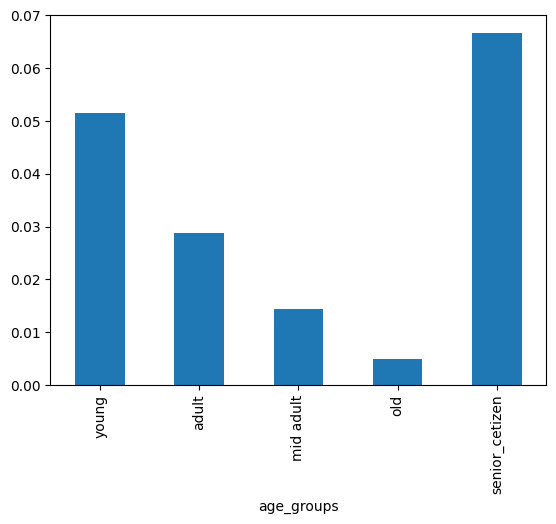

In [23]:
df.groupby('age_groups')['converted'].mean().plot(kind='bar')

In [24]:
df.corr()['converted']

C:\Users\Hakim Aljanabi\AppData\Local\Temp\ipykernel_16364\2125145080.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['converted']


age                   -0.088797
new_user              -0.152374
total_pages_visited    0.528994
converted              1.000000
Name: converted, dtype: float64

In [25]:
df = pd.get_dummies(df,drop_first=True)

In [26]:
df.head()

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo,age_groups_adult,age_groups_mid adult,age_groups_old,age_groups_senior_cetizen
0,25,1,1,0,0,1,0,0,0,0,0,0,0
1,23,1,5,0,0,0,1,0,1,0,0,0,0
2,28,1,4,0,0,0,1,0,1,1,0,0,0
3,39,1,5,0,0,0,0,0,1,0,1,0,0
4,30,1,6,0,0,0,1,0,1,1,0,0,0


In [27]:
df

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo,age_groups_adult,age_groups_mid adult,age_groups_old,age_groups_senior_cetizen
0,25,1,1,0,0,1,0,0,0,0,0,0,0
1,23,1,5,0,0,0,1,0,1,0,0,0,0
2,28,1,4,0,0,0,1,0,1,1,0,0,0
3,39,1,5,0,0,0,0,0,1,0,1,0,0
4,30,1,6,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316195,26,1,9,0,0,0,1,0,0,1,0,0,0
316196,27,1,6,0,0,0,1,1,0,1,0,0,0
316197,25,0,4,0,0,0,0,0,0,0,0,0,0
316198,22,0,4,0,0,0,1,0,1,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X= df.drop('converted',axis=1)
y= df['converted']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=2)

In [57]:
from sklearn.dummy import DummyClassifier

In [58]:
dum = DummyClassifier()

In [59]:
dum.fit(X_train,y_train)

DummyClassifier()

In [60]:
dum.score(X_train,y_train)

0.9677735610373182

In [61]:
dum.score(X_test,y_test)

0.9676154332700823

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn = KNeighborsClassifier()

In [64]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
knn.score(X_train,y_train)

0.9863693864642631

In [66]:
predict = knn.predict(X_test)

In [67]:
knn.score(X_test,y_test)

0.9842504743833017

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
tree = DecisionTreeClassifier()

In [70]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [71]:
tree.score(X_train,y_train)

0.9883499367488932

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier()

In [74]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
rf.score(X_train,y_train)

0.9883499367488932

In [76]:
rf_predictions = rf.predict(X_test)

In [77]:
df2 = pd.DataFrame({'actual':y_test,'predictions':rf_predictions})

<AxesSubplot: >

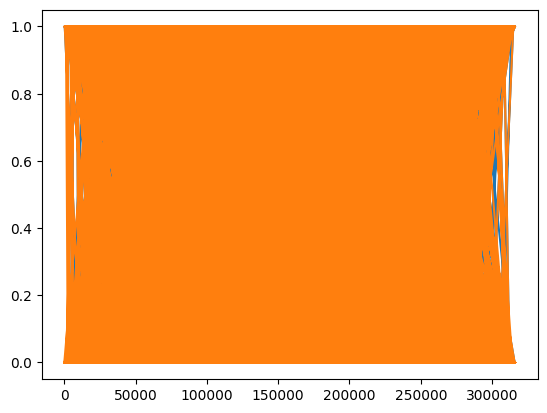

In [78]:
df2['actual'].plot()
df2['predictions'].plot()

In [79]:
import pickle

In [80]:
filename ='rf.model.sav'

In [81]:
pickle.dump(rf,open(filename,'wb'))